# A computational exploration of ladder operators in the QHO (1D):
## Author: Silva Alejandro (Yachay Tech University)
## Date: 20/05/2025

In [1]:
# Import necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import scienceplots
from scipy.special import hermite

In [2]:
# Set plots style
plt.style.use(['science', 'notebook', 'no-latex'])

## Define the ladder operators over a vector:

In [3]:
## 1. Generate the vector
N = 1000 #size of space
x = np.linspace(-20., 20., N)

# Define the spacing
dx = x[1] - x[0]

## 2. Define x and p operators as square matrices
# 2.1 Position operator (diagonal)
x_op = np.diag(x) #diagonalize to ensure the correct matrix (operator) vector (wavefunction) multiplication

# 2.2 Define the momentum operator, in position basis
# Generate the square matrix
p_op = np.zeros((N, N), dtype=complex)

# Use central finite differences to compute the derivatives and construct the matrix elemnts
for i in range(1, N-1):
    p_op[i, i+1] = -1j / (2 * dx)  # forward term
    p_op[i, i-1] =  1j / (2 * dx)  # backward term
# One-sided difference at boundaries
p_op[0, 1]     = -1j / (2 * dx)    # forward difference at first point
p_op[-1, -2]   =  1j / (2 * dx)   # backward difference at last point

## 3. Define the ladder operators
# In natural units m = hbar = w = 1
def a_rais(x_op, p_op):
    """
    Raising operator matrix in the 1D QHO.
    """
    return (1/np.sqrt(2))*(x_op - 1j*p_op)

def a_low(x_op, p_op):
    """
    Lowering operator matrix in the 1D QHO.
    """
    return (1/np.sqrt(2))*(x_op + 1j*p_op)

In [4]:
# Safe check on the commutation relation
a_comm = np.dot(a_low(x_op, p_op), a_rais(x_op, p_op)) - np.dot(a_rais(x_op, p_op), a_low(x_op, p_op))

# W should get the identity matrix, but there's always some error
identity = np.eye(N)

# Compute the norms
norm_id = np.linalg.norm(identity, 2)
norm_comm = np.linalg.norm(a_comm, 2)

# print(a_comm)
# print(abs(norm_comm - norm_id)) #should be close to zero, a_comm should be approximately the identity matrix

In [5]:
# Safe check on the ground state

# 1. Define the ground state in natural units
psi_0 = 1/(np.pi**(1/4))*np.exp(-x**2/2)

# 2. Check the action of the lowering operator over it
a_0 = np.dot(a_low(x_op, p_op), psi_0) #we should get zeroes
# Safe check
# print(np.round(a_0, 4))

Our operators are working as they should!

## Eigenfunctions of the QHO:

In [6]:
# First excited level
psi_1 = np.dot(a_rais(x_op, p_op), psi_0)

# Second excited level
psi_2 = np.dot(a_rais(x_op, p_op), np.dot(a_rais(x_op, p_op), psi_0))/np.sqrt(2) #recall the normalization factor 1/sqrt(n!)

print(psi_1.shape)
print(psi_2.shape)

(1000,)
(1000,)


In [7]:
def excited_state(n, x_op, p_op, psi_0):
    """
    This function computes de nth excited state of the QHO, using the raising ladder operator.
    Inputs:
        n -> index of the required excited state.
        x_op -> matrix representation of the position operator, in position basis.
        p_op -> matrix representation of the momentum operator, in position basis.
    Output:
        psi_n -> array, nth excited state of the QHO
    """
    if n == 0:
        return psi_0
    else:
        return np.dot(a_rais(x_op, p_op), excited_state(n - 1, x_op, p_op, psi_0)) / np.sqrt(math.factorial(n))

### IMPORTANT
The function above just works until $n = 20$. Then, my guess is that the values are to small to work with. So, is there a better way to compute the excited states?

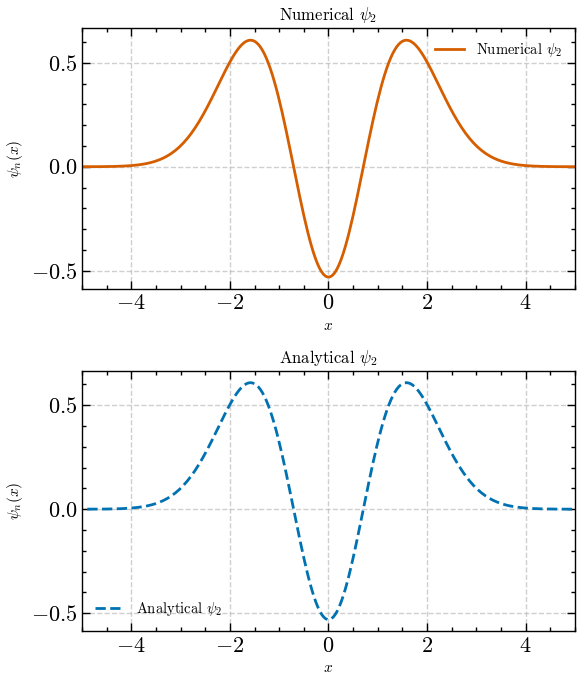

In [8]:
# Apply the raising operator
n = 2
psi_2 = excited_state(n, x_op, p_op, psi_0)

# Hermite polynomial and analytical wavefunction
H2 = hermite(n)
psi_n_analytical = (1/np.sqrt((2**n) * math.factorial(n))) * (1/np.pi**0.25) * H2(x) * np.exp(-x**2/2)

# Plot
# Create two subplots side by side
fig, axs = plt.subplots(2, 1, figsize=(6, 7))

# Plot 1: Numerical (real part)
axs[0].plot(x, psi_2.real, label = f"Numerical $\psi_{{{n}}}$", color = "#D55E00", linewidth = 2)
axs[0].set_xlabel(r'$x$', fontsize=11)
axs[0].set_ylabel(r'$\psi_n(x)$', fontsize=11)
axs[0].set_title(r'Numerical $\psi_{%d}$' % n, fontsize=12)
axs[0].legend(fontsize=10.5)
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[0].set_xlim(-5, 5)

# Plot 2: Analytical
axs[1].plot(x, psi_n_analytical, '--', label = f"Analytical $\psi_{{{n}}}$", color = "#0072B2", linewidth = 2)
axs[1].set_xlabel(r'$x$', fontsize=11)
axs[1].set_ylabel(r'$\psi_n(x)$', fontsize=11)
axs[1].set_title(r'Analytical $\psi_{%d}$' % n, fontsize=12)
axs[1].legend(fontsize=10.5)
axs[1].grid(True, linestyle='--', alpha=0.6)
axs[1].set_xlim(-5, 5)

# Final layout and saving
plt.tight_layout()
# plt.savefig(f"psi{n}_separate_panels.pdf", dpi=300)
plt.show()

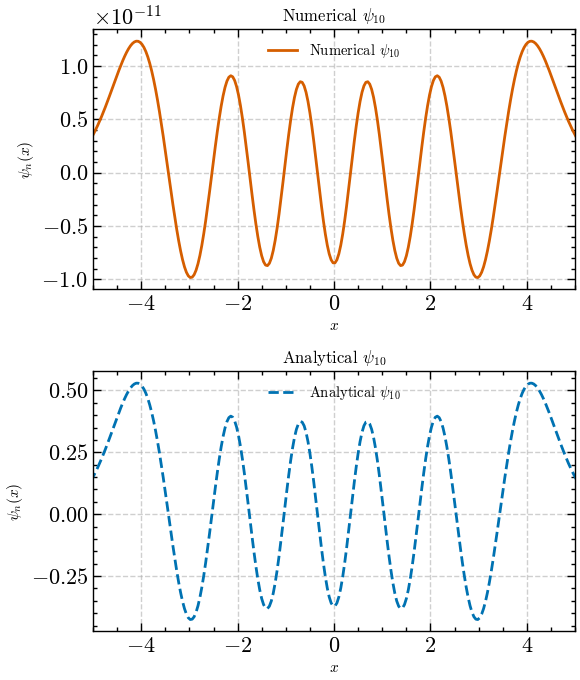

In [9]:
# Apply the raising operator
n = 10
psi_10 = excited_state(n, x_op, p_op, psi_0)

# Hermite polynomial and analytical wavefunction
H2 = hermite(n)
psi_n_analytical = (1/np.sqrt(2**n * math.factorial(n))) * (1/np.pi**0.25) * H2(x) * np.exp(-x**2/2)

# Plot
# Create two subplots side by side
fig, axs = plt.subplots(2, 1, figsize=(6, 7))

# Plot 1: Numerical (real part)
axs[0].plot(x, psi_10.real, label = f"Numerical $\psi_{{{n}}}$", color = "#D55E00", linewidth = 2)
axs[0].set_xlabel(r'$x$', fontsize=11)
axs[0].set_ylabel(r'$\psi_n(x)$', fontsize=11)
axs[0].set_title(r'Numerical $\psi_{%d}$' % n, fontsize=12)
axs[0].legend(fontsize=10.5)
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[0].set_xlim(-5, 5)

# Plot 2: Analytical
axs[1].plot(x, psi_n_analytical, '--', label = f"Analytical $\psi_{{{n}}}$", color = "#0072B2", linewidth = 2)
axs[1].set_xlabel(r'$x$', fontsize=11)
axs[1].set_ylabel(r'$\psi_n(x)$', fontsize=11)
axs[1].set_title(r'Analytical $\psi_{%d}$' % n, fontsize=12)
axs[1].legend(fontsize=10.5)
axs[1].grid(True, linestyle='--', alpha=0.6)
axs[1].set_xlim(-5, 5)

# Final layout and saving
plt.tight_layout()
# plt.savefig(f"psi{n}_separate_panels.pdf", dpi=300)
plt.show()

### Orthogonality of eigenfunctions:

In [10]:
# Let's check
# Orthogonality
print(np.dot(psi_2, psi_10))
print()

# Let's check the normalization
print(np.dot(psi_2, psi_2))

(1.0625522499130086e-16+0j)

(24.945002871072084+0j)


However, the normality condition is not working. I have to check that.

## Eigenvalues of ladder operators:

In [11]:
# Use numpy linalg library
## Raising operator
eigvals_rais_op, eigfuncts_rais_op = np.linalg.eig(a_rais(x_op, p_op))

## Lowering operator
eigvals_low_op, eigfuncts_low_op = np.linalg.eig(a_low(x_op, p_op))

In [12]:
# print(eigvals_rais_op[10])
# print()
# print(eigfuncts_rais_op[:, 10])

In [13]:
print(f"The raising ladder operator {N}x{N} has {eigvals_rais_op.size} eigenvalues.")
# We check the type of an arbitrary eigenvalue
print(f"The eigenvalues of the raising ladder operator are of type{type(eigvals_rais_op[50])}")

The raising ladder operator 1000x1000 has 1000 eigenvalues.
The eigenvalues of the raising ladder operator are of type<class 'numpy.complex128'>


In [14]:
print(f"The lowering ladder operator {N}x{N} has {eigvals_low_op.size} eigenvalues.")
# We check the type of an arbitrary eigenvalue
print(f"The eigenvalues of the lowering ladder operator are of type{type(eigvals_low_op[50])}")

The lowering ladder operator 1000x1000 has 1000 eigenvalues.
The eigenvalues of the lowering ladder operator are of type<class 'numpy.complex128'>


## Expectation values of ladder operators

Since the (eigenfunctions) are represented as column vectors, and the operator is represented as a matrix, we are just going to use the dot product multiplication while also considering the conjugate.

### Firts attempt:

In [15]:
# n = 2
exp_2_rais = np.vdot(psi_2, a_rais(x_op, p_op) @ psi_2)  # np.vdot does conjugate-transpose
print(exp_2_rais)

# n = 10
exp_10_rais = np.vdot(psi_10, a_rais(x_op, p_op) @ psi_10)  # np.vdot does conjugate-transpose
print(exp_10_rais)

# n = 17
psi_17 = excited_state(17, x_op, p_op, psi_0)
exp_17_rais = np.dot(psi_17, a_rais(x_op, p_op) @ psi_17)  # np.vdot does conjugate-transpose
print(exp_17_rais)

(9.714983877855582e-17+0j)
(-1.6029830049067323e-35+0j)
(8.39975891626392e-97+0j)


In [16]:
# n = 2
exp_2_rais = np.vdot(psi_2, a_low(x_op, p_op) @ psi_2)  # np.vdot does conjugate-transpose
print(exp_2_rais)

# n = 10
exp_10_rais = np.vdot(psi_10, a_low(x_op, p_op) @ psi_10)  # np.vdot does conjugate-transpose
print(exp_10_rais)

(2.6101644571136903e-16+0j)
(-1.7530871772202458e-35+0j)


We're just checking orthogonality.

### Second attempt:

In [17]:
psi_3 = excited_state(3, x_op, p_op, psi_0)
psi_4 = excited_state(4, x_op, p_op, psi_0)
psi_5 = excited_state(5, x_op, p_op, psi_0)
psi_6 = excited_state(6, x_op, p_op, psi_0)
psi_7 = excited_state(7, x_op, p_op, psi_0)
psi_8 = excited_state(8, x_op, p_op, psi_0)
psi_9 = excited_state(9, x_op, p_op, psi_0)
psi_11 = excited_state(11, x_op, p_op, psi_0)
psi_12 = excited_state(12, x_op, p_op, psi_0)
psi_13 = excited_state(13, x_op, p_op, psi_0)
psi_14 = excited_state(14, x_op, p_op, psi_0)
psi_15 = excited_state(15, x_op, p_op, psi_0)

In [18]:
psi_super1 = (psi_4 + psi_14 + psi_5)/np.sqrt(3)

# Ensure normality, to represent valid quantum states
psi_super1 /= np.linalg.norm(psi_super1)

# Compute the expectation value
print(np.vdot(psi_super1, a_rais(x_op, p_op) @ psi_super1))

(0.4390035996763154+0j)


In [19]:
psi_super2 = (psi_9 + 1j * psi_1 + psi_5) / np.sqrt(2)

# Ensure normality, to represent valid quantum states
psi_super2 /= np.linalg.norm(psi_super2)

# Compute the expectation value
print(np.vdot(psi_super2, a_low(x_op, p_op) @ psi_super2))

(6.9976794858425e-17+1.6117624372611415e-17j)


In [20]:
psi_super3 = (psi_0 - psi_14 -3j * psi_5 - psi_3) / 2

# Ensure normality, to represent valid quantum states
psi_super3 /= np.linalg.norm(psi_super3)

# Compute the expectation value
print(np.vdot(psi_super3, a_low(x_op, p_op) @ psi_super3))

(-0.00018886692514316235+2.0995593604192332e-05j)


In [21]:
psi_super4 = (-3.6j*psi_8 - 2j*psi_13 - 8.2*psi_6 + 0.002j*psi_11)/np.sqrt(7)

# Ensure normality, to represent valid quantum states
psi_super4 /= np.linalg.norm(psi_super4)

# Compute the expectation value
print(np.vdot(psi_super4, a_rais(x_op, p_op) @ psi_super4))

(-1.6313648579616856e-16-2.159956131541321e-18j)
